# LDA vs PCA

In [1]:
### Lets compare how same data visulise using PCA and LDA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

%matplotlib inline

#### Lets import Data(iris) and apply PCA and LDA

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_variable = iris.target_names
feature_variables = iris.feature_names

In [4]:
### Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

In [5]:
## Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X,y).transform(X)

If you see both above you will get some difference in fit values. Because PCA is unsupervised and we only focused on X although LDA is supervised and we have to calculate the within and between class matrix. LDA;s main focus is to do dimentionality reduction considering class variance as much as possbile. We only transform X(input variable)in LDA So We mentioned Class column(output variable y)

In [6]:
print(X_pca.shape)
print(X_lda.shape)
print(type(X_pca))
print(type(X_lda))

(150, 2)
(150, 2)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
## lets print the Pricipal components for PCA
print("First 2 principal components(Explained Variance Ratio): %s" %str(pca.explained_variance_ratio_))

First 2 principal components(Explained Variance Ratio): [0.92461872 0.05306648]


In [8]:
## Apply KNN Classifier using PCA
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_pca,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
## Apply KNN Classifier using LDA
from sklearn.neighbors import KNeighborsClassifier
knn_lda = KNeighborsClassifier()
knn_lda.fit(X_lda,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Plot the LDA and PCA and observer the comparission of Classes

There are many way to plot the grapg so I tried to include many way.

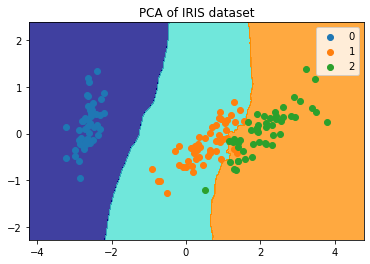

In [10]:
## Plot the visual representation using PCA
from matplotlib.colors import ListedColormap
X_set, y_set = X_pca, y
classifier = knn_pca
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navy', 'turquoise', 'darkorange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                c = ListedColormap(('navy', 'turquoise', 'darkorange'))(i),
                label = j)
plt.title('PCA of IRIS dataset')
plt.legend()
plt.show()


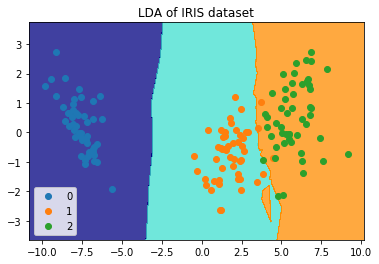

In [11]:
## Method -1
## Plot the visual representation using LDA
from matplotlib.colors import ListedColormap
X_set, y_set = X_lda, y
classifier = knn_lda
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navy', 'turquoise', 'darkorange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                c = ListedColormap(('navy', 'turquoise', 'darkorange'))(i),
                label = j)
plt.title('LDA of IRIS dataset')
plt.legend()
plt.show()


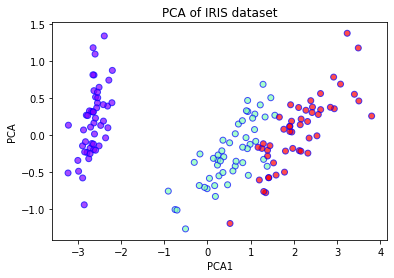

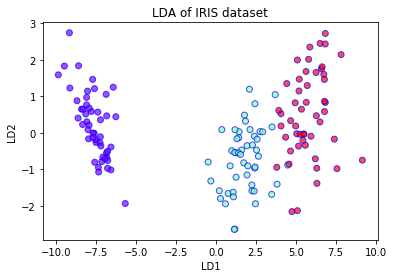

In [12]:
## Method - 2
plt.figure(1)

plt.xlabel('PCA1')
plt.ylabel('PCA')
plt.title('PCA of IRIS dataset')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

plt.figure(2)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of IRIS dataset')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

plt.show()

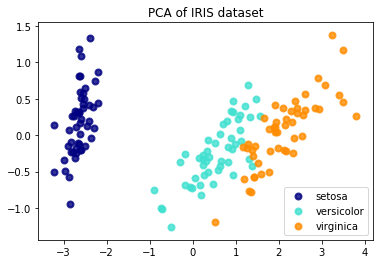

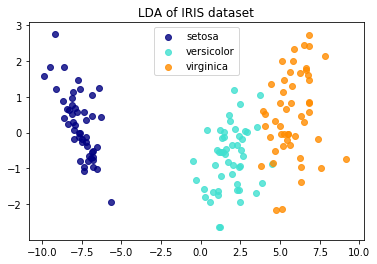

In [13]:
## Method - 3

plt.figure(1)
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
X_r = X_pca
X_r2 = X_lda
for color, i, target_name in zip(colors, [0, 1, 2], target_variable):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure(2)
for color, i, target_name in zip(colors, [0, 1, 2], target_variable):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

If you observer from the the above graphs you can clearlly visulise that 

**PCA** only minimize the error in reconstruction and maximize the variance in the datasets and no considerayion was given to output variable(class). in PCA our goal was not to separate the 3 classes. Goal was maximize the variances in datsets.

**LDA** trying to maximize between class distance and minimize the within class distance. in LDA our goal was to maximixe the between class distance and minimize the within class distance